# Part 1

In [2]:
import pandas as pd
import numpy as np

recipes = pd.read_csv("recipes.csv")

## Question 1

In [3]:
recipes["cuisine"] = recipes["cuisine"].replace(r'^\s*$', np.nan, regex = True) #replaces all empty cells with NaN
#print(recipes.isnull().sum()) #find number of null values
mode = recipes['cuisine'].mode().values[0] #finds the mode of the cuisine column
recipes["cuisine"] = recipes["cuisine"].fillna(mode) #replaces NaN values with the mode
recipes.describe() #Q1
recipes.nlargest(10, "rating_avg") #Q1 

,Unnamed: 0,id,title,image_url,recipe_url,rating_avg,rating_val,total_time,category,cuisine,ingredients
1,1,2,Adaptable bean soup,https://food-images.files.bbci.co.uk/food/reci...,https://www.bbc.co.uk/food/recipes/nigelsadapt...,5.0,11,60,Light meals & snacks,British,"orange, swiss chard, onion, carrot, tomato, ol..."
4,4,5,All-day breakfast frittata,https://food-images.files.bbci.co.uk/food/reci...,https://www.bbc.co.uk/food/recipes/all-day_bre...,5.0,10,60,Main course,British,"bacon, potato, cherry tomatoes, mushroom, spin..."
5,5,6,All-in-one turkey,https://food-images.files.bbci.co.uk/food/reci...,https://www.bbc.co.uk/food/recipes/all-in-one_...,5.0,3,180,Main course,British,"turkey breast, pancetta, dried apricots, apple..."
10,10,11,Aloo gobi and jeera rice,https://food-images.files.bbci.co.uk/food/reci...,https://www.bbc.co.uk/food/recipes/aloo_gobi_a...,5.0,12,60,Main course,Indian,"onion, chilli pepper, potato, cauliflower, sun..."
11,11,12,Alpine pizza,https://food-images.files.bbci.co.uk/food/reci...,https://www.bbc.co.uk/food/recipes/alpine_pizz...,5.0,7,70,Main course,Italian,"salami, red onion, crème fraîche, gruyère, str..."
13,13,14,American baked cheesecake,https://food-images.files.bbci.co.uk/food/reci...,https://www.bbc.co.uk/food/recipes/americanbak...,5.0,1,90,Cakes and baking,American,"sultanas, banana, lemon, egg, single cream, cr..."
14,14,15,Anchovy and sage crisps,https://ichef.bbci.co.uk/images/ic/640xn/p015b...,https://www.bbc.co.uk/food/recipes/anchovy_and...,5.0,1,60,Starters & nibbles,British,"anchovies, vegetable oil, egg, sage, breadcrum..."
16,16,17,Angel food cake with lemon curd,https://food-images.files.bbci.co.uk/food/reci...,https://www.bbc.co.uk/food/recipes/angel_food_...,5.0,4,180,Cakes and baking,American,"lemon, passion fruit, lemon juice, egg, whippi..."
19,19,20,Apple and passion fruit tartlets,https://food-images.files.bbci.co.uk/food/reci...,https://www.bbc.co.uk/food/recipes/appleandpas...,5.0,1,150,Desserts,French,"apple, passion fruit, egg, milk, caster sugar,..."
22,22,23,Apple and rhubarb muffins,https://food-images.files.bbci.co.uk/food/reci...,https://www.bbc.co.uk/food/recipes/apple_and_r...,5.0,4,60,Cakes and baking,British,"rhubarb, apple, sunflower oil, egg, buttermilk..."


## Question 2

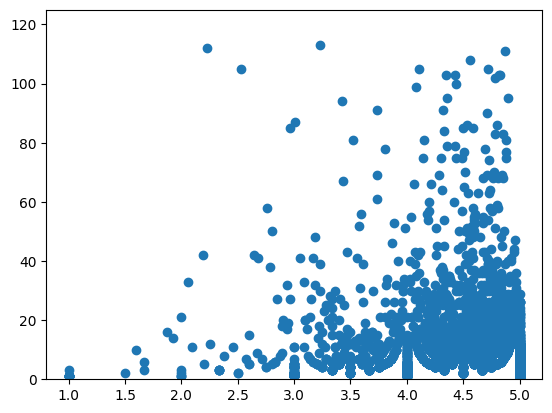

In [4]:
import matplotlib.pyplot as plt

#Stating the axis for the graph
x = recipes["rating_avg"]
y = recipes["rating_val"]

#Creating a scatter plot
plt.scatter(x, y)
#Showing only y values between 0 and 125 as points above are considered as anomalies
plt.ylim(0, 125)
plt.show()

I would say the rating_val should be a minimum of 30 for the rating_avg to be considered significant. This is because at around that rating_val number the dots in the scatter plot seem to start seperating a bit more between eachother (especially at higher ratings) showing that the relationship that the rating_avg has with rating_val is decreasing.

## Question 3

### 3a)

In [5]:
#Creates a blank column
recipes["combine_features"] = ""
#For each row it combines the features into 1 string and adds it to the previously created column
for ind in recipes.index:
    recipes["combine_features"][ind] = str(recipes["title"][ind]) + " " + str(recipes["image_url"][ind]) + " " + str(recipes["recipe_url"][ind]) + " " + str(recipes["rating_avg"][ind]) + " " + str(recipes["rating_val"][ind]) + " " + str(recipes["total_time"][ind]) + " " + str(recipes["category"][ind]) + " " + str(recipes["cuisine"][ind]) + " " + str(recipes["ingredients"][ind])

/var/folders/3r/lm1h5j9n0nj2wblsnb5prwq00000gn/T/ipykernel_83541/4271851801.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes["combine_features"][ind] = str(recipes["title"][ind]) + " " + str(recipes["image_url"][ind]) + " " + str(recipes["recipe_url"][ind]) + " " + str(recipes["rating_avg"][ind]) + " " + str(recipes["rating_val"][ind]) + " " + str(recipes["total_time"][ind]) + " " + str(recipes["category"][ind]) + " " + str(recipes["cuisine"][ind]) + " " + str(recipes["ingredients"][ind])


### 3b)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

cv = CountVectorizer()
matrix = cv.fit_transform(recipes["combine_features"])
cosine_sim = cosine_similarity(matrix)
print(cosine_sim)

[[1.         0.52466067 0.62502032 ... 0.53250804 0.46188022 0.53783412]
 [0.52466067 1.         0.61485672 ... 0.59868434 0.51116565 0.56215628]
 [0.62502032 0.61485672 1.         ... 0.58896814 0.51218222 0.63029485]
 ...
 [0.53250804 0.59868434 0.58896814 ... 1.         0.50947807 0.55234477]
 [0.46188022 0.51116565 0.51218222 ... 0.50947807 1.         0.50459284]
 [0.53783412 0.56215628 0.63029485 ... 0.55234477 0.50459284 1.        ]]


### 3c)

In [7]:
index = recipes[recipes["title"] == "Almond lentil stew"].index.values

#Using the cosine similarity matrix from 3b to find and sort the most similar recipes too it.
similar_to_index = pd.DataFrame(cosine_sim[index[0], :], columns = ['similar'])
res = similar_to_index.sort_values(by='similar', ascending=False)

#Prints the 10 most similar recipes. Start at 1 because "Almond lentil stew" is at index 0
for i in res.index[1:11]:
    print(recipes.iloc[i, 2])

Lentil soup
Smoked pancetta and lentil soup
Lentil bolognese
Vegetable stock
Spring lamb stew
Vegan moussaka 
Cheesy bean and lentil bake 
Healthy bacon and lentil soup
Christmas ham
Rabbit casserole


# Part 2

## Question 4

In [8]:
def most_popular(r):
    
    #Sets the input recipe to user_choice
    user_choice = r
    
    #Chooses a random recipe from the dataframe
    random = recipes.sample()
    
    #Returns the top 10 rates recipes
    return recipes.nlargest(10, "rating_avg")

most_popular("Almond lentil stew")

,Unnamed: 0,id,title,image_url,recipe_url,rating_avg,rating_val,total_time,category,cuisine,ingredients,combine_features
1,1,2,Adaptable bean soup,https://food-images.files.bbci.co.uk/food/reci...,https://www.bbc.co.uk/food/recipes/nigelsadapt...,5.0,11,60,Light meals & snacks,British,"orange, swiss chard, onion, carrot, tomato, ol...",Adaptable bean soup https://food-images.files....
4,4,5,All-day breakfast frittata,https://food-images.files.bbci.co.uk/food/reci...,https://www.bbc.co.uk/food/recipes/all-day_bre...,5.0,10,60,Main course,British,"bacon, potato, cherry tomatoes, mushroom, spin...",All-day breakfast frittata https://food-images...
5,5,6,All-in-one turkey,https://food-images.files.bbci.co.uk/food/reci...,https://www.bbc.co.uk/food/recipes/all-in-one_...,5.0,3,180,Main course,British,"turkey breast, pancetta, dried apricots, apple...",All-in-one turkey https://food-images.files.bb...
10,10,11,Aloo gobi and jeera rice,https://food-images.files.bbci.co.uk/food/reci...,https://www.bbc.co.uk/food/recipes/aloo_gobi_a...,5.0,12,60,Main course,Indian,"onion, chilli pepper, potato, cauliflower, sun...",Aloo gobi and jeera rice https://food-images.f...
11,11,12,Alpine pizza,https://food-images.files.bbci.co.uk/food/reci...,https://www.bbc.co.uk/food/recipes/alpine_pizz...,5.0,7,70,Main course,Italian,"salami, red onion, crème fraîche, gruyère, str...",Alpine pizza https://food-images.files.bbci.co...
13,13,14,American baked cheesecake,https://food-images.files.bbci.co.uk/food/reci...,https://www.bbc.co.uk/food/recipes/americanbak...,5.0,1,90,Cakes and baking,American,"sultanas, banana, lemon, egg, single cream, cr...",American baked cheesecake https://food-images....
14,14,15,Anchovy and sage crisps,https://ichef.bbci.co.uk/images/ic/640xn/p015b...,https://www.bbc.co.uk/food/recipes/anchovy_and...,5.0,1,60,Starters & nibbles,British,"anchovies, vegetable oil, egg, sage, breadcrum...",Anchovy and sage crisps https://ichef.bbci.co....
16,16,17,Angel food cake with lemon curd,https://food-images.files.bbci.co.uk/food/reci...,https://www.bbc.co.uk/food/recipes/angel_food_...,5.0,4,180,Cakes and baking,American,"lemon, passion fruit, lemon juice, egg, whippi...",Angel food cake with lemon curd https://food-i...
19,19,20,Apple and passion fruit tartlets,https://food-images.files.bbci.co.uk/food/reci...,https://www.bbc.co.uk/food/recipes/appleandpas...,5.0,1,150,Desserts,French,"apple, passion fruit, egg, milk, caster sugar,...",Apple and passion fruit tartlets https://food-...
22,22,23,Apple and rhubarb muffins,https://food-images.files.bbci.co.uk/food/reci...,https://www.bbc.co.uk/food/recipes/apple_and_r...,5.0,4,60,Cakes and baking,British,"rhubarb, apple, sunflower oil, egg, buttermilk...",Apple and rhubarb muffins https://food-images....


## Question 5

In [12]:
def vector_space_method(r):
    #Creates a new dataframe with the columns from recipes that are of type float or int.
    vsp = recipes[["rating_avg", "total_time", "rating_val"]]
    #Creates an additional empty column
    vsp["combine"] = ""
    
    #sums vsp["rating_avg"], + vsp["total_time"], vsp["rating_val"] for each row and puts it in vsp["combine"]
    for ind in vsp.index:
        vsp["combine"][ind] = vsp["rating_avg"][ind] + vsp["total_time"][ind] + vsp["rating_val"][ind]
    
    print(vsp['combine'])
    
    #Computes similarity matrix
    sim_mat = cosine_similarity(vsp, vsp)
    
    #Finds the index of the recipe title of the input.
    index = recipes[recipes["title"] == r].index.values

    #Cretes a dataframe with the similar recipes to the input recipe
    similar_to_index = pd.DataFrame(sim_mat[index[0], :], columns = ['similar'])
    
    #Sorts them by the most similar to the least
    res = similar_to_index.sort_values(by='similar', ascending=False)
    
    
    l = []
    #Add the top 10 most similar recipes to list l
    for i in res.index[0:10]:
        l.append(recipes.iloc[i, 2])
        
    return l
        
vector_space_method("Almond lentil stew")

/var/folders/3r/lm1h5j9n0nj2wblsnb5prwq00000gn/T/ipykernel_83541/1679809049.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vsp["combine"] = ""
/var/folders/3r/lm1h5j9n0nj2wblsnb5prwq00000gn/T/ipykernel_83541/1679809049.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vsp["combine"][ind] = vsp["rating_avg"][ind] + vsp["total_time"][ind] + vsp["rating_val"][ind]


0       101.285714
1             76.0
2             40.0
3       172.611111
4             75.0
           ...    
3288          70.5
3289    135.585366
3290        114.85
3291          67.0
3292     71.714286
Name: combine, Length: 3293, dtype: object


['Cheese scone',
 'Almond lentil stew',
 'Vegetarian tagine with roasted cauliflower, apricots and chickpeas',
 'Spiced banana bread ',
 'Chocolate tahini pudding with tahini cream and date molasses',
 'Double baked cheese soufflés',
 'Jackfruit and bean chilli',
 'Chicken and red wine casserole',
 'Simple stuffing balls ',
 'Chicken and cashew noodle stir-fry']

## Question 6

In [34]:
from scipy.spatial import distance

def knn_similarity(r):
    #Creating a list of the columns which are of type float or int
    numeric_columns = ["rating_avg", "total_time", "rating_val"]
    
    #Creating a dataframe with the numeric_columns
    recipes_num = recipes[numeric_columns]
    
    #Normalising the recipes
    recipes_normalised = (recipes_num - recipes_num.mean()) / recipes_num.std()

    #Normalising the recipe inputed
    item_normalised = recipes_normalised[recipes["title"] == r]

    #Calculating the euclidean distance between each row and the recipe inputed
    euclidean_distances = recipes_normalised.apply(lambda row: distance.euclidean(row, item_normalised), axis=1)

    #Creating a dataframe with the distance of each moview from the input
    distance_frame = pd.DataFrame(data={"dist": euclidean_distances, "idx": euclidean_distances.index})
    
    #Sorting the dataset
    distance_frame.sort_values("dist", inplace=True)

    #Returing the top 10 most similar recipes
    res = []
    num = 10
    for i in range(0,num):
        sim = distance_frame.iloc[i]["idx"]
        most_similar_to_item = recipes.loc[int(sim)]["title"]
        if most_similar_to_item == r:
            num = 1
            continue
        res.append(most_similar_to_item)

    return res

knn_similarity("Almond lentil stew")

['Cheese scone',
 'Salmon pasta bake',
 'How to make brownies',
 'Sardinesca',
 'Chorizo shakshuka with flatbreads',
 'Slow-cooked tomato and fennel stew with pearl barley',
 'Easy sausage casserole',
 'Baked sea bream Rota-style',
 'Fennel and potato gratin']

## Question 7

### Reccomender method most_popular()

The function most_popular() will always return the same 10 recipes no matter what input is given as shown previously. Because of this the coverage is 10/3293 = 0.00303674461. Because of this the personalisation value would be 0 as it will always return the same 10 recipes.

### Reccomender method vector_space_method()

In [36]:
from collections import Counter

cov = []
per = []

#Appends the list reccomendations for each input into per. making per a 2d array.
per.append(vector_space_method("Chicken tikka masala"))
per.append(vector_space_method("Albanian baked lamb with rice (Tavë kosi)"))
per.append(vector_space_method("Baked salmon with chorizo rice"))
per.append(vector_space_method("Chicken and coconut curry"))

#Appends every reccomendation to cov
for item in vector_space_method("Chicken tikka masala"):
    cov.append(item)
for item in vector_space_method("Albanian baked lamb with rice (Tavë kosi)"):
    cov.append(item)
for item in vector_space_method("Baked salmon with chorizo rice"):
    cov.append(item)
for item in vector_space_method("Chicken and coconut curry"):
    cov.append(item)

#Checks if any recipes appears twice
print(Counter(cov))
    
#Calculates coverage
coverage = len(cov)/3293
print("Coverage is: "+str(coverage))

#Creates a dataframe with the recipes as columns and user as index
df = pd.DataFrame(index=range(4),columns=cov)

#If the user got reccomended that recipes it puts a 1 where the user row and the recipe column intercect.
for i in range(0,4):
    for j in range(0,len(per[i])):
        item = per[i][j]
        index = df.columns.get_loc(item)
        df. iat[i, index] = 1

#Raplaces NaN values with 0
df = df.replace(np.nan, 0)

#Computes Cosine Similarity Matrix
cosine_sim_mat = cosine_similarity(df, df)

print(cosine_sim_mat)

<ipython-input-33-2e6c5edc7405>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vsp["combine"] = ""
<ipython-input-33-2e6c5edc7405>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vsp["combine"][ind] = vsp["rating_avg"][ind] + vsp["total_time"][ind] + vsp["rating_val"][ind]
<ipython-input-36-9c8688177049>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per.append(vector_space_

Counter({'Chicken tikka masala': 1, 'Porchetta': 1, 'Cawl': 1, 'Slow-cooked ham': 1, 'Banana cocoa crunch overnight oats': 1, 'Sticky barbecue chicken ': 1, 'Moroccan-style chicken casserole': 1, 'Oven-fried chicken': 1, 'Back-to-front baked cheesecake ': 1, 'Pollack, chorizo and chickpea stew': 1, 'Albanian baked lamb with rice (Tavë kosi)': 1, 'Irish beef stew': 1, 'Slow cooker chicken stew': 1, 'Chicken and chorizo paella': 1, 'Meatballs in a spicy tomato sauce (Boles de picolat)': 1, 'Chicken chasseur': 1, 'Honey and marmalade-glazed gammon joint': 1, "Nadiya's lentil soup and soda bread ": 1, 'Custard slice': 1, 'Stuffed vegetables': 1, 'Baked salmon with chorizo rice': 1, 'Courgette gratin': 1, 'Prawn saffron biryani': 1, 'Marmalade haddock traybake': 1, 'Chicken and leek pie': 1, 'Moorish meatballs': 1, 'Smoked haddock and cauliflower gratin': 1, 'Baked pappardelle with pancetta and porcini': 1, 'Salmon curry ': 1, 'Vegetable egg-fried rice': 1, 'Chicken and coconut curry': 1, '

The above reccomender system has a coverage value of 0.012146978439113271. Following the equation of personalisation (1-averagecosinesimilarity) this means that the personalisation = 1

## Reccomender method knn_similarity()

In [29]:
from collections import Counter

cov2 = []
per = []

#Appends the list reccomendations for each input into per. making per a 2d array.
per.append(knn_similarity("Chicken tikka masala"))
per.append(knn_similarity("Albanian baked lamb with rice (Tavë kosi)"))
per.append(knn_similarity("Baked salmon with chorizo rice"))
per.append(knn_similarity("Chicken and coconut curry"))

#Appends every reccomendation to cov
for item in knn_similarity("Chicken tikka masala"):
    cov2.append(item)
for item in knn_similarity("Albanian baked lamb with rice (Tavë kosi)"):
    cov2.append(item)
for item in knn_similarity("Baked salmon with chorizo rice"):
    cov2.append(item)
for item in knn_similarity("Chicken and coconut curry"):
    cov2.append(item)

#Checks if any recipes appears twice
print(Counter(cov))
    
#Computes the coverage
coverage = len(cov2)/3293
print("Coverage is: "+str(coverage))

#Creates a datafame with the recipes as columns and user as index
df = pd.DataFrame(index=range(4),columns=cov2)
for i in range(0,4):
    for j in range(0,len(per[i])):
        item = per[i][j]
        index = df.columns.get_loc(item)
        df. iat[i, index] = 1

#Replaces NaN values with 0
df = df.replace(np.nan, 0)


#Computes Similarity Matrix
cosine_sim_mat = cosine_similarity(df, df)
print(cosine_sim_mat)

Coverage is: 0.010932280595201944
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Looking at the cosine similarity matrix the  average of the upper triangle of of this matrix is 0. Following the equation of personalisation (1-averagecosinesimilarity) this means that the personalisation = 1

Out of the 3 reccomender system vector_space_method had the most coverage while the best personalisation score was equal betweeen knn_similarity and vector_space_method. According to these numbers vector_space_method seems to be the best one.